In [ ]:
#Hwk1a

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path ='C:/Users/Brad/Documents/4090/dlwpt-code-master/dlwpt-code-master/data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {6: 0, 7: 1, 8: 2, 9: 3 }
class_names = ['frog', 'horse', 'ship', 'truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [6, 9]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [6, 9]]

In [6]:
import torch.nn as nn


In [7]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [8]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [9]:
softmax(x).sum()

tensor(1.)

In [10]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [11]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


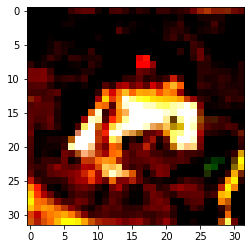

In [12]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [13]:
img_batch = img.view(-1).unsqueeze(0)

In [14]:
out = model(img_batch)
out

tensor([[0.2573, 0.2700, 0.2368, 0.2360]], grad_fn=<SoftmaxBackward>)

In [15]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [16]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [17]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [18]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [19]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

In [20]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [21]:
out0 = out.clone().detach()
out0[0] = torch.tensor([0.9, 0.1]) # more right

out2 = out.clone().detach()
out2[0] = torch.tensor([0.4, 0.6]) # slightly wrong

out3 = out.clone().detach()
out3[0] = torch.tensor([0.1, 0.9]) # very wrong

mse_comparison = torch.tensor([mse(o) for o in [out0, out, out2, out3]])
mse_comparison

tensor([0.0750, 0.1500, 0.2500, 0.4750])

In [22]:
((mse_comparison / mse_comparison[1]) - 1) * 100

tensor([-50.0000,   0.0000,  66.6667, 216.6667])

In [23]:
nll_comparison = torch.tensor([neg_log_likelihood(o) 
                               for o in [out0, out, out2, out3]])
nll_comparison

tensor([0.7905, 1.1960, 1.6015, 2.9878])

In [24]:
((nll_comparison / nll_comparison[1]) - 1) * 100

tensor([-33.9016,   0.0000,  33.9016, 149.8121])

In [25]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [26]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [27]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [28]:
log_softmax(x)

tensor([[-104.,    0.]])

In [29]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [30]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [31]:
loss = nn.NLLLoss()

In [32]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(1.0928, grad_fn=<NllLossBackward>)

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.000621
Epoch: 1, Loss: 0.000146
Epoch: 2, Loss: 0.000003
Epoch: 3, Loss: 0.000011


KeyboardInterrupt: 

In [35]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 4),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.700020
Epoch: 1, Loss: 0.539794
Epoch: 2, Loss: 0.184901
Epoch: 3, Loss: 0.521425
Epoch: 4, Loss: 0.166598
Epoch: 5, Loss: 0.402926
Epoch: 6, Loss: 0.369970
Epoch: 7, Loss: 0.138595
Epoch: 8, Loss: 0.379537
Epoch: 9, Loss: 0.313042
Epoch: 10, Loss: 0.073657
Epoch: 11, Loss: 0.080797
Epoch: 12, Loss: 0.156792
Epoch: 13, Loss: 0.170587
Epoch: 14, Loss: 0.173987
Epoch: 15, Loss: 0.116315
Epoch: 16, Loss: 0.160142
Epoch: 17, Loss: 0.130185
Epoch: 18, Loss: 0.107380
Epoch: 19, Loss: 0.274028
Epoch: 20, Loss: 0.095587
Epoch: 21, Loss: 0.283462
Epoch: 22, Loss: 0.092773
Epoch: 23, Loss: 0.085648
Epoch: 24, Loss: 0.134724
Epoch: 25, Loss: 0.162577
Epoch: 26, Loss: 0.125842
Epoch: 27, Loss: 0.090967
Epoch: 28, Loss: 0.134966
Epoch: 29, Loss: 0.082506
Epoch: 30, Loss: 0.193432
Epoch: 31, Loss: 0.053735
Epoch: 32, Loss: 0.058271
Epoch: 33, Loss: 0.105742
Epoch: 34, Loss: 0.026639
Epoch: 35, Loss: 0.062957
Epoch: 36, Loss: 0.028816
Epoch: 37, Loss: 0.075163
Epoch: 38, Loss: 0.036

In [38]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [39]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.913000


In [ ]:
#Hwk1b

In [40]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [41]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.607313
Epoch: 1, Loss: 0.332005
Epoch: 2, Loss: 0.343704
Epoch: 3, Loss: 0.285983
Epoch: 4, Loss: 0.159504
Epoch: 5, Loss: 0.317812
Epoch: 6, Loss: 0.076195
Epoch: 7, Loss: 0.084640
Epoch: 8, Loss: 0.621011
Epoch: 9, Loss: 0.221187
Epoch: 10, Loss: 0.111456
Epoch: 11, Loss: 0.251891
Epoch: 12, Loss: 0.274677
Epoch: 13, Loss: 0.264373
Epoch: 14, Loss: 0.363818
Epoch: 15, Loss: 0.336531
Epoch: 16, Loss: 0.676009
Epoch: 17, Loss: 0.060131
Epoch: 18, Loss: 0.125624
Epoch: 19, Loss: 0.250098
Epoch: 20, Loss: 0.042196
Epoch: 21, Loss: 0.022132
Epoch: 22, Loss: 0.238810
Epoch: 23, Loss: 0.084742
Epoch: 24, Loss: 0.063083
Epoch: 25, Loss: 0.114829
Epoch: 26, Loss: 0.059178
Epoch: 27, Loss: 0.014512
Epoch: 28, Loss: 0.007952
Epoch: 29, Loss: 0.011046
Epoch: 30, Loss: 0.027810
Epoch: 31, Loss: 0.043188
Epoch: 32, Loss: 0.005255
Epoch: 33, Loss: 0.004669
Epoch: 34, Loss: 0.271344
Epoch: 35, Loss: 0.003364
Epoch: 36, Loss: 0.003607
Epoch: 37, Loss: 0.009931
Epoch: 38, Loss: 0.002

In [44]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [45]:

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.905000


In [ ]:
sum([p.numel() for p in model.parameters()])

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

In [ ]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [ ]:
conv.weight.shape

In [ ]:
conv.bias.shape

In [ ]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [ ]:
img.unsqueeze(0).shape, output.shape

In [ ]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

In [ ]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
output.shape

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [ ]:
output = conv(img.unsqueeze(0))

output.shape

In [ ]:
with torch.no_grad():
    conv.bias.zero_()

In [ ]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
#Hwk4

In [69]:
pool = nn.MaxPool2d(2)

In [70]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])

In [71]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [72]:
sum([p.numel() for p in model.parameters()])

18156

In [73]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x8 and 512x32)

In [58]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [59]:
model = Net()

sum([p.numel() for p in model.parameters()])

18090

In [ ]:
#Hwk4-2a

In [75]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 4)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [76]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.0769,  0.0367, -0.1418, -0.0365]], grad_fn=<AddmmBackward>)

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 4)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200


In [79]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [80]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 200,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-04-21 18:24:09.890126 Epoch 1, Training loss 0.6444759665021471
2021-04-21 18:24:31.482989 Epoch 10, Training loss 0.17408925840619263
2021-04-21 18:24:56.483869 Epoch 20, Training loss 0.10203702878325609
2021-04-21 18:25:22.954892 Epoch 30, Training loss 0.0735774517806757
2021-04-21 18:25:48.313882 Epoch 40, Training loss 0.057291600423135386
2021-04-21 18:26:14.946601 Epoch 50, Training loss 0.047367630655444255
2021-04-21 18:26:40.926584 Epoch 60, Training loss 0.03975336703584547
2021-04-21 18:27:07.638663 Epoch 70, Training loss 0.03403935049791008
2021-04-21 18:27:34.929574 Epoch 80, Training loss 0.028880257138709543
2021-04-21 18:28:01.583125 Epoch 90, Training loss 0.024637013178461106
2021-04-21 18:28:29.581828 Epoch 100, Training loss 0.019156839928417733
2021-04-21 18:28:55.958610 Epoch 110, Training loss 0.01684642701475009
2021-04-21 18:29:22.337377 Epoch 120, Training loss 0.01298315448991978
2021-04-21 18:29:50.195217 Epoch 130, Training loss 0.010160728137877882

In [82]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        
validate(model, train_loader, val_loader)

Accuracy train: 1.00
Accuracy val: 0.98


#Hwk2b

In [88]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [89]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.1051,  0.0927,  0.0289, -0.0531,  0.0245,  0.0713,  0.1372,  0.0733,
         -0.0660, -0.1187]], grad_fn=<AddmmBackward>)

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

In [91]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [92]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 200,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-04-21 18:46:05.152122 Epoch 1, Training loss 2.029663713844231
2021-04-21 18:49:12.914402 Epoch 10, Training loss 1.153426479500578
2021-04-21 18:52:43.158874 Epoch 20, Training loss 0.97370917420558
2021-04-21 18:56:12.543778 Epoch 30, Training loss 0.8852849273425539
2021-04-21 18:59:42.165758 Epoch 40, Training loss 0.8273465525158836
2021-04-21 19:03:18.269952 Epoch 50, Training loss 0.7887913025248691
2021-04-21 19:06:48.375026 Epoch 60, Training loss 0.7538359201777621
2021-04-21 19:10:20.735413 Epoch 70, Training loss 0.7272006276699589
2021-04-21 19:13:51.034919 Epoch 80, Training loss 0.7039669872549794
2021-04-21 19:17:21.923673 Epoch 90, Training loss 0.6821176612087528
2021-04-21 19:20:52.113565 Epoch 100, Training loss 0.6606125457741111
2021-04-21 19:24:22.912471 Epoch 110, Training loss 0.6448947941631917
2021-04-21 19:27:54.105152 Epoch 120, Training loss 0.6309462723219791
2021-04-21 19:31:26.071002 Epoch 130, Training loss 0.6184532960967335
2021-04-21 19:34:58.0

In [93]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        
validate(model, train_loader, val_loader)

Accuracy train: 0.80
Accuracy val: 0.61


In [ ]:
#Hwk2c

In [98]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(8, 4, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * 4)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [99]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0643, -0.1141,  0.0634,  0.0546,  0.1250,  0.1496, -0.1668, -0.1009,
          0.0061, -0.1099]], grad_fn=<AddmmBackward>)

In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(8, 4, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * 4)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

In [101]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [102]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 200,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-04-21 20:21:20.284368 Epoch 1, Training loss 2.287555693970312
2021-04-21 20:24:42.853466 Epoch 10, Training loss 1.3919866992079692
2021-04-21 20:28:35.511324 Epoch 20, Training loss 1.2058600393097725
2021-04-21 20:32:21.557189 Epoch 30, Training loss 1.1166145098788658
2021-04-21 20:35:59.427709 Epoch 40, Training loss 1.0698939385773885
2021-04-21 20:39:36.827536 Epoch 50, Training loss 1.0400219319574058
2021-04-21 20:43:13.808751 Epoch 60, Training loss 1.0141821569951295
2021-04-21 20:46:51.377711 Epoch 70, Training loss 0.9983639169836898
2021-04-21 20:50:28.436299 Epoch 80, Training loss 0.9832006833513679
2021-04-21 20:54:07.498179 Epoch 90, Training loss 0.9716682440179694
2021-04-21 20:57:43.582146 Epoch 100, Training loss 0.9606901334832086
2021-04-21 21:01:21.368229 Epoch 110, Training loss 0.9517096621758493
2021-04-21 21:04:59.247559 Epoch 120, Training loss 0.9428336047150595
2021-04-21 21:08:37.393238 Epoch 130, Training loss 0.93647877654761
2021-04-21 21:12:15.

In [103]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        
validate(model, train_loader, val_loader)

Accuracy train: 0.67
Accuracy val: 0.64
